# House Pricing
## Student Name: Hiep Vo Dang
---

## Dataset:

https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data

## Problem Statement:

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:
- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.

We are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.




The solution is divided into the following sections: 
1. Data understanding and exploration
2. Data cleaning
3. Data preparation
4. Modeling 
5. Model Performance Evaluation

## 1. Data Understanding and Exploration

### 1.1 Import necessary packages and functions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.linear_model
import sklearn.model_selection
import sklearn.metrics
import sklearn.preprocessing


# hide warnings
import warnings
warnings.filterwarnings('ignore')

### 1.2 Read file, and show summary

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### 1.3 Data Exploration

In [5]:
# Drop Id because it has no intrinsic meanings
data = data.drop(labels=['Id'], axis=1)

# Get numerical variables
numerical_vars = data.select_dtypes(include=['float64', 'int64'])

# Drop MSSubClass (categorical variable), month-related and year-related variables are treated as categorical
numerical_vars = numerical_vars.drop(
    labels=['MSSubClass','MoSold','YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],
    axis=1
)
numerical_vars.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,65.0,8450,7,5,196.0,706,0,150,856,856,...,2,548,0,61,0,0,0,0,0,208500
1,80.0,9600,6,8,0.0,978,0,284,1262,1262,...,2,460,298,0,0,0,0,0,0,181500
2,68.0,11250,7,5,162.0,486,0,434,920,920,...,2,608,0,42,0,0,0,0,0,223500
3,60.0,9550,7,5,0.0,216,0,540,756,961,...,3,642,0,35,272,0,0,0,0,140000
4,84.0,14260,8,5,350.0,655,0,490,1145,1145,...,3,836,192,84,0,0,0,0,0,250000


In [6]:
# Get categorical variables
categorical_vars = data[[var for var in data.columns if var not in numerical_vars]]
categorical_vars.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,TA,TA,Y,NaN,NaN,NaN,2,2008,WD,Normal
1,20,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,TA,TA,Y,NaN,NaN,NaN,5,2007,WD,Normal
2,60,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,TA,TA,Y,NaN,NaN,NaN,9,2008,WD,Normal
3,70,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,TA,TA,Y,NaN,NaN,NaN,2,2006,WD,Abnorml
4,60,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,TA,TA,Y,NaN,NaN,NaN,12,2008,WD,Normal


In [7]:
# Pairwise plot to detect any linear relationship
numerical_vars.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'SalePrice'],
      dtype='object')

In [8]:
correlation_table = numerical_vars.corr()
correlation_table

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
LotFrontage,1.000000,0.426095,0.251646,-0.059213,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,...,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.351799
LotArea,0.426095,1.000000,0.105806,-0.005636,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,...,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.263843
OverallQual,0.251646,0.105806,1.000000,-0.091932,0.411876,0.239666,-0.059119,0.308159,0.537808,0.476224,...,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.790982
OverallCond,-0.059213,-0.005636,-0.091932,1.000000,-0.128101,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,...,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.077856
MasVnrArea,0.193458,0.104160,0.411876,-0.128101,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,...,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,0.477493
BsmtFinSF1,0.233633,0.214103,0.239666,-0.046231,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,...,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,0.386420
BsmtFinSF2,0.049900,0.111170,-0.059119,0.040229,-0.072319,-0.050117,1.000000,-0.209294,0.104810,0.097117,...,-0.038264,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.011378
BsmtUnfSF,0.132644,-0.002618,0.308159,-0.136841,0.114442,-0.495251,-0.209294,1.000000,0.415360,0.317987,...,0.214175,0.183303,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.214479
TotalBsmtSF,0.392075,0.260833,0.537808,-0.171098,0.363936,0.522396,0.104810,0.415360,1.000000,0.819530,...,0.434585,0.486665,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.613581
1stFlrSF,0.457181,0.299475,0.476224,-0.144203,0.344501,0.445863,0.097117,0.317987,0.819530,1.000000,...,0.439317,0.489782,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.605852


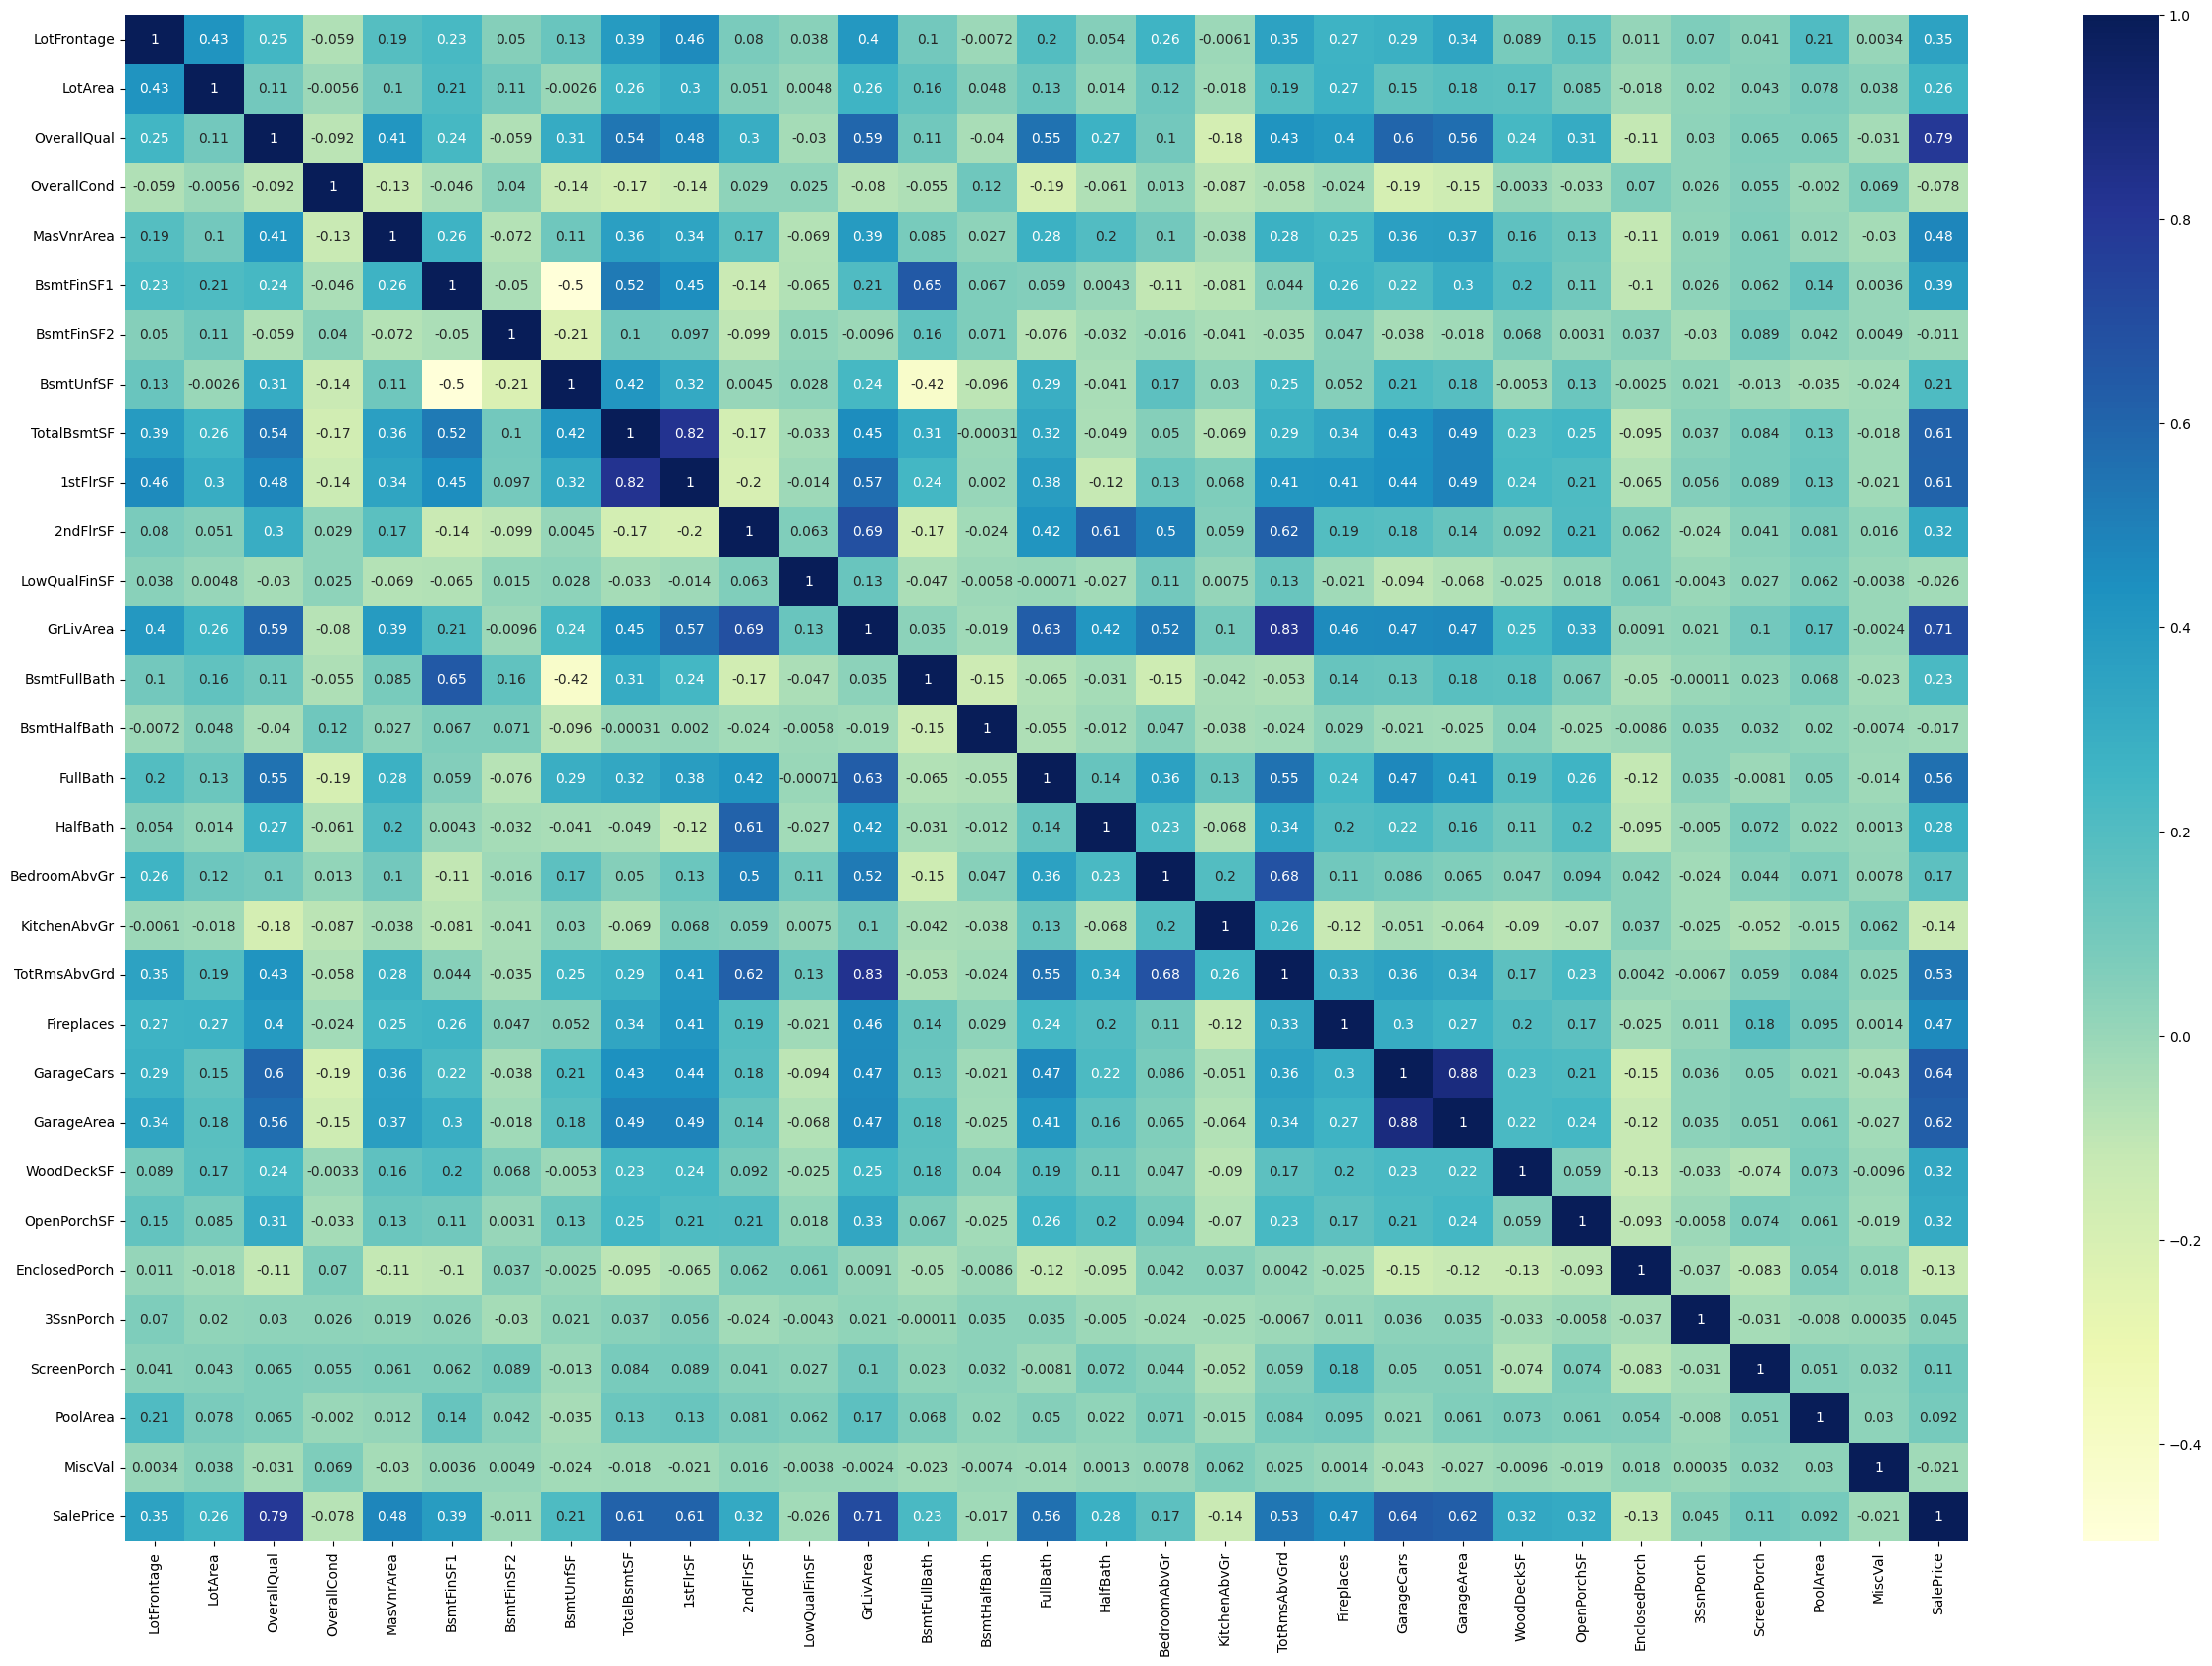

In [9]:
# Plotting correlations on a heatmap
# figure size
plt.figure(figsize=(30, 20))
# heatmap
sns.heatmap(correlation_table, cmap="YlGnBu", annot=True)
plt.show()

### Findings Revealed by Heat Map:

Correlation of price with independent variables:
- Overall Quality (OverallQual), Total square feet of basement area (TotalBsmtSF), First floor square feet (1stFlrSF), Above grade (ground) living area square feet (GrLivArea), Size of garage in car capacity (GarageCars), Size of garage in square feet (GarageArea) have strong (positive) linear relationship with Sale Price (SalePrice)
- Type 2 finished square feet (BsmtFinSF2), Overall condition of the house (OverallCond), Low quality finished square feet on all floors (LowQualFinSF), Basement half bathrooms (BsmtHalfBath), Kitchen above grade (KitchenAbvGr), Enclosed porch area in square feet (EnclosedPorch), $Value of miscellaneous feature (MiscVal), Year Sold (YrSold) only show slightly negative correlation with sale price

Correlation among independent variables:
- Pairs of variables that are strongly related includes: BsmtFullBath - BsmtFinSF1, 1stFlrSF - TotalBsmtSF, TotRmsAbvGrd - GrLivArea, GarageArea - GarageCars

## 2. Data Cleaning

We can see that there are many missing values in some independent variables. As a result, those variables should be treated case by case in the data cleaning steps

### 2.1 Missing Value Treatment:

In [10]:
# Our first step is to completely eliminate variables having > 30% missing values
rows = data.shape[0]
for var in data.columns.drop('SalePrice'):
    if data[var].isna().sum() > 0.3 * rows:
        data.drop(var, axis=1, inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

`LotFrontage`:

In [11]:
data['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

The data distributes mostly around its center. Hence, we can replace missing values with the median

In [12]:
m = data['LotFrontage'].median()
data['LotFrontage'] = data['LotFrontage'].fillna(m)

In [13]:
data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPor

`MasVnrArea`:

In [14]:
data['MasVnrArea'].value_counts()

MasVnrArea
0.0      861
180.0      8
72.0       8
108.0      8
120.0      7
        ... 
562.0      1
89.0       1
921.0      1
762.0      1
119.0      1
Name: count, Length: 327, dtype: int64

Majority of its values are 0. As a result, we could replace missing value with 0

In [15]:
data['MasVnrArea'] = data['MasVnrArea'].fillna(0)

`BsmtQual`, `BsmtCond`, `BsmtExposure`, `BsmtFinType1`, `BsmtFinType2`:

For all of those variables, as clearly stated in the Data Definition, missing value (NA) means 'No Basement'. We could represent it as 'NoBsmt'

In [16]:
columns = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']
data[columns] = data[columns].fillna('NoBsmt')

`Electrical`:

In [17]:
data['Electrical'].value_counts()

Electrical
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: count, dtype: int64

This variable has 1 missing value, 'SBrkr' is the most frequent value. We could replace the missing value with 'SBrkr'

In [18]:
data['Electrical'] = data['Electrical'].fillna('SBrkr')

`GarageType`, `GarageYrBlt`, `GarageFinish`, `GarageQual`, `GarageCond`:

For all of those variables, as clearly stated in the Data Definition, missing value (NA) means 'No Garage'. We could represent it as 'NoGarage'

In [19]:
columns = ['GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond']
data[columns] = data[columns].fillna('NoGarage')

In [20]:
# We can see there are no longer missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

## 3. Data Preparation

### 3.1 Predictors:

In [21]:
X = data[data.columns.drop('SalePrice')]
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,0,0,12,2008,WD,Normal


### 3.2 Target:

In [22]:
y = data['SalePrice']
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

### 3.3 Categorical predictors:

In [23]:
# Subset categorical variables. Regard months, years as categorical:
X_categorical = X.select_dtypes('object')
X_categorical = pd.concat(
    [X_categorical, X[['MoSold','YearBuilt','YearRemodAdd','GarageYrBlt','YrSold']].astype('object')],
    axis=1
)
X_categorical.head()
X_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   LotShape       1460 non-null   object
 3   LandContour    1460 non-null   object
 4   Utilities      1460 non-null   object
 5   LotConfig      1460 non-null   object
 6   LandSlope      1460 non-null   object
 7   Neighborhood   1460 non-null   object
 8   Condition1     1460 non-null   object
 9   Condition2     1460 non-null   object
 10  BldgType       1460 non-null   object
 11  HouseStyle     1460 non-null   object
 12  RoofStyle      1460 non-null   object
 13  RoofMatl       1460 non-null   object
 14  Exterior1st    1460 non-null   object
 15  Exterior2nd    1460 non-null   object
 16  ExterQual      1460 non-null   object
 17  ExterCond      1460 non-null   object
 18  Foundation     1460 non-null

In [24]:
# Convert rategorical variables to dummy variables:
X_dummies = pd.get_dummies(X_categorical, drop_first=True)
X_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,GarageYrBlt_2006.0,GarageYrBlt_2007.0,GarageYrBlt_2008.0,GarageYrBlt_2009.0,GarageYrBlt_2010.0,GarageYrBlt_NoGarage,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010
0,False,False,True,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
1,False,False,True,False,True,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
2,False,False,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [25]:
# Drop categorial variables, concat the result with dummies:
X = X.drop(X_categorical.columns, axis=1)
X = pd.concat([X, X_dummies], axis=1)
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageYrBlt_2006.0,GarageYrBlt_2007.0,GarageYrBlt_2008.0,GarageYrBlt_2009.0,GarageYrBlt_2010.0,GarageYrBlt_NoGarage,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010
0,60,65.0,8450,7,5,196.0,706,0,150,856,...,False,False,False,False,False,False,False,True,False,False
1,20,80.0,9600,6,8,0.0,978,0,284,1262,...,False,False,False,False,False,False,True,False,False,False
2,60,68.0,11250,7,5,162.0,486,0,434,920,...,False,False,False,False,False,False,False,True,False,False
3,70,60.0,9550,7,5,0.0,216,0,540,756,...,False,False,False,False,False,False,False,False,False,False
4,60,84.0,14260,8,5,350.0,655,0,490,1145,...,False,False,False,False,False,False,False,True,False,False


### 3.4 Numerical predictors:


In [26]:
# Subset numerical predictors
X_numerical = data[[var for var in X.columns if var not in X_dummies.columns]]
X_numerical.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,60,65.0,8450,7,5,196.0,706,0,150,856,...,0,2,548,0,61,0,0,0,0,0
1,20,80.0,9600,6,8,0.0,978,0,284,1262,...,1,2,460,298,0,0,0,0,0,0
2,60,68.0,11250,7,5,162.0,486,0,434,920,...,1,2,608,0,42,0,0,0,0,0
3,70,60.0,9550,7,5,0.0,216,0,540,756,...,1,3,642,0,35,272,0,0,0,0
4,60,84.0,14260,8,5,350.0,655,0,490,1145,...,1,3,836,192,84,0,0,0,0,0


### 3.5 Scaling

In [27]:
# Scale all variables
X = pd.DataFrame(sklearn.preprocessing.scale(X), columns=X.columns)
X.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageYrBlt_2006.0,GarageYrBlt_2007.0,GarageYrBlt_2008.0,GarageYrBlt_2009.0,GarageYrBlt_2010.0,GarageYrBlt_NoGarage,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010
count,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,...,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03
mean,-8.455945e-17,2.798370e-16,-5.840077e-17,1.387018e-16,3.540547e-16,-3.893385e-17,-2.433366e-17,-3.406712e-17,-6.600504e-17,2.457699e-16,...,3.041707e-17,1.216683e-17,-5.840077e-17,2.920039e-17,1.460019e-17,-5.475072e-17,-2.190029e-17,-4.380058e-17,-9.733462e-18,-2.920039e-17
std,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,...,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00
min,-8.725628e-01,-2.219047e+00,-9.237292e-01,-3.688413e+00,-4.112970e+00,-5.707501e-01,-9.730182e-01,-2.886528e-01,-1.284176e+00,-2.411167e+00,...,-2.052140e-01,-1.863522e-01,-1.423571e-01,-1.208034e-01,-4.537649e-02,-2.423597e-01,-5.393450e-01,-5.128116e-01,-5.488604e-01,-3.690349e-01
25%,-8.725628e-01,-4.479400e-01,-2.969908e-01,-7.951515e-01,-5.171998e-01,-5.707501e-01,-9.730182e-01,-2.886528e-01,-7.793259e-01,-5.966855e-01,...,-2.052140e-01,-1.863522e-01,-1.423571e-01,-1.208034e-01,-4.537649e-02,-2.423597e-01,-5.393450e-01,-5.128116e-01,-5.488604e-01,-3.690349e-01
50%,-1.631095e-01,-3.922314e-02,-1.040633e-01,-7.183611e-02,-5.171998e-01,-5.707501e-01,-1.319022e-01,-2.886528e-01,-2.031633e-01,-1.503334e-01,...,-2.052140e-01,-1.863522e-01,-1.423571e-01,-1.208034e-01,-4.537649e-02,-2.423597e-01,-5.393450e-01,-5.128116e-01,-5.488604e-01,-3.690349e-01
75%,3.098594e-01,4.149067e-01,1.087080e-01,6.514792e-01,3.817427e-01,3.383686e-01,5.891327e-01,-2.886528e-01,5.450557e-01,5.491227e-01,...,-2.052140e-01,-1.863522e-01,-1.423571e-01,-1.208034e-01,-4.537649e-02,-2.423597e-01,-5.393450e-01,-5.128116e-01,-5.488604e-01,-3.690349e-01
max,3.147673e+00,1.104155e+01,2.051827e+01,2.821425e+00,3.078570e+00,8.285201e+00,1.140575e+01,8.851638e+00,4.004295e+00,1.152095e+01,...,4.872962e+00,5.366183e+00,7.024587e+00,8.277911e+00,2.203785e+01,4.126099e+00,1.854101e+00,1.950034e+00,1.821957e+00,2.709771e+00


In [28]:
# Scale response variable
y = pd.Series(sklearn.preprocessing.scale(y), name='SalePrice')

### 3.6 Split data into train set, test set

In [29]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    X, y,
    train_size=0.7,
    test_size=0.3,
    random_state=1
)

## 4. Model building and Evaluation

### 4.1 Linear Regression

In [30]:
linreg = sklearn.linear_model.LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [31]:
y_pred_train = linreg.predict(X_train)
y_pred_test = linreg.predict(X_test)

linreg_r2_train = sklearn.metrics.r2_score(y_train, y_pred_train)
linreg_r2_test = sklearn.metrics.r2_score(y_test, y_pred_test)
linreg_rss_train = np.sum(np.square(y_train - y_pred_train))
linreg_rss_test = np.sum(np.square(y_test - y_pred_test))
linreg_mse_train = sklearn.metrics.mean_squared_error(y_train, y_pred_train)
linreg_mse_test = sklearn.metrics.mean_squared_error(y_test, y_pred_test)

print(f'R2 of Linear Regression on train set: {linreg_r2_train}')
print(f'R2 of Linear Regression on test set: {linreg_r2_test}')
print(f'RSS of Linear Regression on train set: {linreg_rss_train}')
print(f'RSS of Linear Regression on test set: {linreg_rss_test}')
print(f'MSE of Linear Regression on train set: {linreg_mse_train}')
print(f'MSE of Linear Regression on test set: {linreg_mse_test}')

R2 of Linear Regression on train set: 0.949152993887863
R2 of Linear Regression on test set: -1.4921375381602272e+25
RSS of Linear Regression on train set: 48.933512588479594
RSS of Linear Regression on test set: 7.399311732644959e+27
MSE of Linear Regression on train set: 0.04792704465081253
MSE of Linear Regression on test set: 1.6893405782294427e+25


In [32]:
# record metrics into a list for later use
lingreg_metrics = [
    linreg_r2_train,
    linreg_r2_test,
    linreg_rss_train,
    linreg_rss_test,
    linreg_mse_train ** 0.5,
    linreg_mse_test ** 0.5,
]

We can see that the model cannot generalize to unseen data. This suggests that our model is overfitting. Hence, we will do Ridge and Lasso Regression to counter this issue

### 4.2 Ridge Regression

In [33]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {
    'alpha': [
        0.0001, 0.001, 0.01, 0.05, 0.1, 
        0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 
        0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 
        7.0, 8.0, 9.0, 10.0, 20, 50, 100, 
        500, 1000, 2000, 5000
    ]
}

# cross validation
model_cv = sklearn.model_selection.GridSearchCV(
    estimator=sklearn.linear_model.Ridge(), 
    param_grid=params, 
    scoring='neg_mean_absolute_error', 
    cv=5, 
    return_train_score=True,
    verbose=1,
)            
model_cv.fit(X_train, y_train)

# show best model's alpha
model_cv.best_params_

Fitting 5 folds for each of 30 candidates, totalling 150 fits


{'alpha': 500}

In [34]:
# get the best model (which has alpha = 500)
ridge = model_cv.best_estimator_

In [35]:
# Calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

ridge_r2_train = sklearn.metrics.r2_score(y_train, y_pred_train)
ridge_r2_test = sklearn.metrics.r2_score(y_test, y_pred_test)
ridge_rss_train = np.sum(np.square(y_train - y_pred_train))
ridge_rss_test = np.sum(np.square(y_test - y_pred_test))
ridge_mse_train = sklearn.metrics.mean_squared_error(y_train, y_pred_train)
ridge_mse_test = sklearn.metrics.mean_squared_error(y_test, y_pred_test)

print(f'R2 of Ridge Regression on train set: {ridge_r2_train}')
print(f'R2 of Ridge Regression on test set: {ridge_r2_test}')
print(f'RSS of Ridge Regression on train set: {ridge_rss_train}')
print(f'RSS of Ridge Regression on test set: {ridge_rss_test}')
print(f'MSE of Ridge Regression on train set: {ridge_mse_train}')
print(f'MSE of Ridge Regression on test set: {ridge_mse_test}')

R2 of Ridge Regression on train set: 0.8951440429581796
R2 of Ridge Regression on test set: 0.8454967038349338
RSS of Ridge Regression on train set: 100.90997850625172
RSS of Ridge Regression on test set: 76.61613107435498
MSE of Ridge Regression on train set: 0.09883445495225437
MSE of Ridge Regression on test set: 0.17492267368574196


In [36]:
# record metrics into a list for later use
ridge_metrics = [
    ridge_r2_train,
    ridge_r2_test,
    ridge_rss_train,
    ridge_rss_test,
    ridge_mse_train ** 0.5,
    ridge_mse_test ** 0.5,
]

### 4.3 Lasso Regression

In [37]:
# cross validation
model_cv = sklearn.model_selection.GridSearchCV(
    estimator=sklearn.linear_model.Lasso(),
    param_grid=params, 
    scoring='neg_mean_absolute_error', 
    cv=5, 
    return_train_score=True,
    verbose=1,
)
model_cv.fit(X_train, y_train) 
# show best model's alpha
model_cv.best_params_

Fitting 5 folds for each of 30 candidates, totalling 150 fits


{'alpha': 0.01}

In [38]:
# get the best model (which has alpha=0.01)
lasso = model_cv.best_estimator_

In [39]:
# Calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

lasso_r2_train = sklearn.metrics.r2_score(y_train, y_pred_train)
lasso_r2_test = sklearn.metrics.r2_score(y_test, y_pred_test)
lasso_rss_train = np.sum(np.square(y_train - y_pred_train))
lasso_rss_test = np.sum(np.square(y_test - y_pred_test))
lasso_mse_train = sklearn.metrics.mean_squared_error(y_train, y_pred_train)
lasso_mse_test = sklearn.metrics.mean_squared_error(y_test, y_pred_test)

print(f'R2 of Lasso Regression on train set: {lasso_r2_train}')
print(f'R2 of Lasso Regression on test set: {lasso_r2_test}')
print(f'RSS of Lasso Regression on train set: {lasso_rss_train}')
print(f'RSS of Lasso Regression on test set: {lasso_rss_test}')
print(f'MSE of Lasso Regression on train set: {lasso_mse_train}')
print(f'MSE of Lasso Regression on test set: {lasso_mse_test}')

R2 of Lasso Regression on train set: 0.894757200418737
R2 of Lasso Regression on test set: 0.857254590928122
RSS of Lasso Regression on train set: 101.28226324277736
RSS of Lasso Regression on test set: 70.78555113820435
MSE of Lasso Regression on train set: 0.09919908251006597
MSE of Lasso Regression on test set: 0.16161084734749853


In [40]:
# record the metrics into a list for later use
lasso_metrics = [
    lasso_r2_train,
    lasso_r2_test,
    lasso_rss_train,
    lasso_rss_test,
    lasso_mse_train ** 0.5,
    lasso_mse_test ** 0.5,
]


## 5. Model Performance Evaluation

In [41]:
metric_records = {
    'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)','MSE (Train)','MSE (Test)'],
    'Linear Regression': lingreg_metrics,
    'Ridge Regression': ridge_metrics,
    'Lasso Regression': lasso_metrics,
}
performance_table = pd.DataFrame(metric_records).set_index('Metric')
performance_table

,Linear Regression,Ridge Regression,Lasso Regression
Metric,,,
R2 Score (Train),9.491530e-01,0.895144,0.894757
R2 Score (Test),-1.492138e+25,0.845497,0.857255
RSS (Train),4.893351e+01,100.909979,101.282263
RSS (Test),7.399312e+27,76.616131,70.785551
MSE (Train),2.189225e-01,0.314379,0.314959
MSE (Test),4.110159e+12,0.418238,0.402009


The R2_square of Ridge Regression and Lasso Regression between train and test set are almost the same. We can be confident that the models are not overfitting

### Coefficients

In [42]:
betas = pd.DataFrame(index=X.columns)
betas['Linear'] = linreg.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
betas

,Linear,Ridge,Lasso
MSSubClass,-5.175607e-02,-0.028494,-0.076401
LotFrontage,2.204354e-02,-0.002793,-0.004304
LotArea,8.986474e-02,0.041407,0.049265
OverallQual,7.085488e-02,0.096496,0.190931
OverallCond,8.768563e-02,0.037060,0.050450
...,...,...,...
GarageYrBlt_NoGarage,2.613279e+11,-0.000985,0.000010
YrSold_2007,2.279663e-02,0.005772,0.000000
YrSold_2008,2.062035e-02,-0.002503,0.000000
YrSold_2009,-1.437378e-02,-0.005058,-0.000818


## Question 1:
### Which variables are significant in predicting the price of a house?

We can identify important predictors by looking at the magnitude of coefficients:

In [43]:
most_important_variables = betas.loc[betas['Lasso'].abs()>=0.1, 'Lasso']
most_important_variables

OverallQual             0.190931
GrLivArea               0.244337
GarageCars              0.114898
Neighborhood_NridgHt    0.130387
RoofMatl_WdShngl        0.107944
Name: Lasso, dtype: float64

Variables with great (negative and positive) coefficients including:
- OverallQual
- GrLivArea
- GarageCars
- Neighborhood_NridgHt
- RoofMatl_WdShngl

## Question 2:
### How well those variables describe the price of a house?

Looking at the `R2 Score (Test)` of Ridge and Lasso models, we can say that those variables describe approximately 85% of the price of a house.

---